In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [49]:
train_df = pd.read_csv('/kaggle/input/dru-kaggle-intro/train_mobile.csv')
test_df = pd.read_csv('/kaggle/input/dru-kaggle-intro/test_mobile.csv')

In [14]:
train_df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1023,yes,0.6,yes,0,yes,53,0.8,146,3,...,905,1988,2633,17,3.0,8,yes,yes,no,2
1,565,yes,0.6,yes,2,yes,41,1.0,155,5,...,1263,1716,2605,11,2.0,10,yes,yes,no,2
2,617,yes,2.6,no,0,no,10,0.9,141,6,...,1216,1786,2771,16,8.0,12,yes,no,no,2
3,1823,yes,1.3,no,13,yes,44,0.7,151,2,...,1208,1212,1413,8,2.0,16,yes,yes,no,1
4,1823,no,1.8,no,4,yes,10,0.9,149,8,...,381,1018,3222,13,8.0,19,yes,no,yes,3
5,1956,no,0.6,yes,0,no,24,0.9,197,4,...,512,1149,702,16,3.0,6,yes,yes,yes,0
6,1447,yes,0.6,no,0,no,53,0.8,184,7,...,386,836,1101,17,1.0,21,yes,no,no,0
7,511,yes,0.7,yes,2,yes,9,0.2,103,5,...,1137,1224,515,19,10.0,13,yes,no,no,0
8,771,yes,3.0,yes,0,no,9,0.2,192,5,...,248,874,3948,5,2.0,8,no,no,no,3
9,1522,yes,2.3,no,5,yes,33,0.6,187,8,...,151,1005,3828,14,9.0,14,yes,yes,yes,3


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1500 non-null   int64  
 1   blue           1500 non-null   object 
 2   clock_speed    1450 non-null   float64
 3   dual_sim       1460 non-null   object 
 4   fc             1500 non-null   int64  
 5   four_g         1455 non-null   object 
 6   int_memory     1500 non-null   int64  
 7   m_dep          1500 non-null   float64
 8   mobile_wt      1500 non-null   int64  
 9   n_cores        1500 non-null   int64  
 10  pc             1500 non-null   int64  
 11  px_height      1500 non-null   int64  
 12  px_width       1500 non-null   int64  
 13  ram            1500 non-null   int64  
 14  sc_h           1500 non-null   int64  
 15  sc_w           1388 non-null   float64
 16  talk_time      1500 non-null   int64  
 17  three_g        1500 non-null   object 
 18  touch_sc

In [16]:
train_df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,1500.000000,1450.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1388.000000,1500.000000,1500.000000
mean,1238.160000,1.620621,4.324000,32.130000,0.601467,150.330000,4.568667,9.917333,642.916667,1255.106000,2123.830000,12.364667,5.734150,12.036667,1.500000
std,439.103833,0.816908,4.370937,18.077287,0.290150,35.456121,2.308716,6.074902,443.188796,433.117891,1091.421832,4.181787,4.307478,5.483615,1.127319
min,503.000000,0.600000,0.000000,2.000000,0.200000,90.000000,1.000000,0.000000,0.000000,500.000000,258.000000,5.000000,0.000000,3.000000,0.000000
25%,852.750000,0.800000,1.000000,16.000000,0.300000,119.000000,3.000000,5.000000,281.750000,880.500000,1186.750000,9.000000,2.000000,7.000000,0.000000
50%,1221.000000,1.600000,3.000000,32.000000,0.600000,150.000000,5.000000,10.000000,561.500000,1250.500000,2135.500000,12.000000,5.000000,12.000000,1.000000
75%,1608.250000,2.300000,7.000000,48.000000,0.900000,181.000000,7.000000,15.000000,938.000000,1642.250000,3079.250000,16.000000,9.000000,17.000000,3.000000
max,1998.000000,3.100000,19.000000,64.000000,1.100000,210.000000,8.000000,20.000000,1960.000000,1998.000000,4000.000000,19.000000,18.000000,21.000000,3.000000


In [17]:
train_df.isnull().sum()

battery_power      0
blue               0
clock_speed       50
dual_sim          40
fc                 0
four_g            45
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w             112
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [18]:
train_df['clock_speed'].describe()
train_df['dual_sim'].describe()
train_df['four_g'].describe()
train_df['sc_w'].describe()

count    1388.000000
mean        5.734150
std         4.307478
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

,sc_w,sc_h
sc_w,1.000000,0.494208
sc_h,0.494208,1.000000


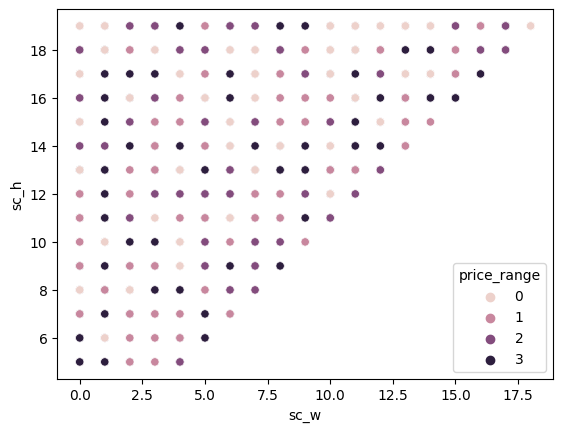

In [36]:
sns.scatterplot(data=train_df, x='sc_w', y='sc_h', hue='price_range')
train_df[['sc_w', 'sc_h']].corr()

In [50]:
train_df['clock_speed'] = train_df['clock_speed'].fillna(train_df['clock_speed'].mean())
train_df['dual_sim'] = train_df['dual_sim'].fillna(train_df['dual_sim'].mode())
train_df['four_g'] = train_df['four_g'].fillna(train_df['four_g'].mode())
train_df['sc_w'] = train_df['sc_w'].interpolate(method='linear')

In [51]:
non_numeric_cols = train_df.select_dtypes(include=['object'])
non_numeric_cols

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,yes,yes,yes,yes,yes,no
1,yes,yes,yes,yes,yes,no
2,yes,no,no,yes,no,no
3,yes,no,yes,yes,yes,no
4,no,no,yes,yes,no,yes
...,...,...,...,...,...,...
1495,no,no,no,yes,yes,no
1496,yes,yes,yes,yes,yes,no
1497,yes,yes,no,yes,yes,yes
1498,no,no,yes,yes,yes,yes


In [53]:
for col in non_numeric_cols:
    train_df[col] = train_df[col].apply(lambda x: 1 if x == 'yes' else 0)
    test_df[col] = test_df[col].apply(lambda x: 1 if x == 'yes' else 0)
    
train_df.select_dtypes(include=['object'])

""
0
1
2
3
4
...
1495
1496
1497
1498


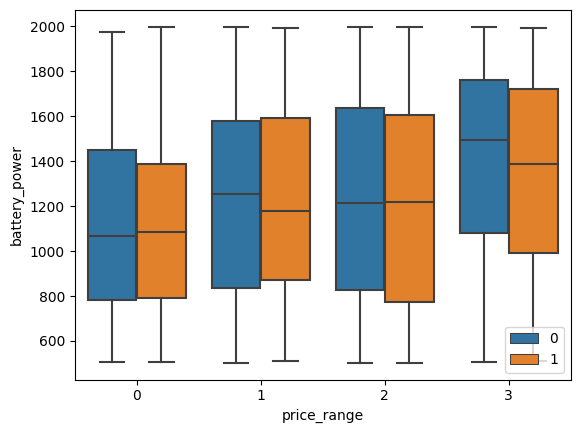

In [23]:
sns.boxplot(data=train_df, y='battery_power', x='price_range', hue='touch_screen')
plt.legend(loc='lower right')

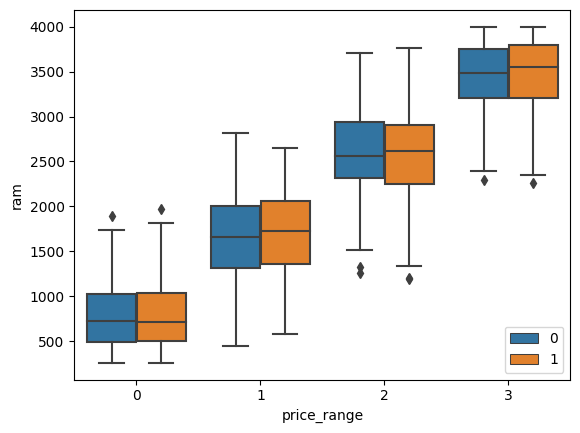

In [24]:
sns.boxplot(data=train_df, y='ram', x='price_range', hue='blue')
plt.legend(loc='lower right')

In [ ]:
sns.boxplot(data=train_df, y='int_memory', x='price_range', hue='three_g')
plt.legend(loc='lower right')

In [ ]:
plt.figure(figsize=(12, 12), dpi=200)
num_features = train_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_features.corr()
sns.heatmap(data=corr_matrix, annot=True, fmt='.3f', linewidth=.4)

well_corr_cols:

fc - pc;
px_width - px_height;
sc_h - sc_w;
3g - 4g;

!!!!!
price_range - ram

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12, 12), dpi=200)
important_features = ['ram', 'battery_power', 'px_height', 'px_width']
sns.pairplot(data=train_df, vars=important_features, diag_kind='kde', corner=False, hue='price_range')

In [ ]:
plt.figure(figsize=(12, 8), dpi=200)
sns.catplot(data=train_df, x='ram', y='battery_power', col='price_range')

In [ ]:
train_df.head()

In [ ]:
cont_cols = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

n = len(cont_cols)
nrows = n // 2
ncols = 2

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, dpi=200, figsize=(12, 12*ncols))
ax = ax.flatten()

for i, col in enumerate(cont_cols):
    sns.boxplot(x=train_df[col], ax=ax[i])
    ax[i].set_title(f'{col}')
    
plt.tight_layout()
plt.show()

there are outliars in: px_height, fc

In [ ]:
sns.scatterplot(data=train_df, x='price_range', y='fc')

In [ ]:
sns.scatterplot(data=train_df, x='price_range', y='px_height')

In [54]:
#1
fc_percentiles = np.percentile(train_df['fc'], [75, 25])
fc_IQR = fc_percentiles[0] - fc_percentiles[1]

fc_lover_limit = fc_percentiles[1] - 1.5 * fc_IQR
fc_upper_limit = fc_percentiles[1] + 1.5 * fc_IQR

#2
px_height_percentiles = np.percentile(train_df['px_height'], [75, 25])
px_height_IQR = px_height_percentiles[0] - px_height_percentiles[1]

px_height_lover_limit = px_height_percentiles[1] - 1.5 * px_height_IQR
px_height_upper_limit = px_height_percentiles[1] + 1.5 * px_height_IQR

In [55]:
trimmed_train_df = train_df.copy()

trimmed_train_df['fc'] = np.clip(trimmed_train_df['fc'], fc_lover_limit, fc_upper_limit)
trimmed_train_df['px_height'] = np.clip(trimmed_train_df['px_height'], px_height_lover_limit, px_height_upper_limit)


In [ ]:
sns.scatterplot(data=trimmed_train_df, x='price_range', y='fc')

In [ ]:
sns.scatterplot(data=trimmed_train_df, x='price_range', y='px_height')

In [56]:
obvious_outliar = train_df[(train_df['px_height'] > 1750) & (train_df['price_range'] == 0)]
train_df_little_trim = train_df.copy()
train_df_little_trim.loc[obvious_outliar.index, 'px_height'] = px_height_upper_limit

In [ ]:
sns.scatterplot(data=train_df_little_trim, x='price_range', y='px_height')

In [57]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

train_df[cont_cols] = std_scaler.fit_transform(train_df[cont_cols])
trimmed_train_df[cont_cols] = std_scaler.fit_transform(trimmed_train_df[cont_cols])
train_df_little_trim[cont_cols] = std_scaler.fit_transform(train_df_little_trim[cont_cols])

test_df[cont_cols] = std_scaler.transform(test_df[cont_cols])

In [85]:
from sklearn.model_selection import train_test_split

train_data_frame = train_df.copy()
X = train_data_frame.drop('price_range', axis=1)
y = train_data_frame['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=17, stratify=y)

In [86]:
train_df_trimmed = trimmed_train_df.copy()
X_t = train_df_trimmed.drop('price_range', axis=1)
y_t = train_df_trimmed['price_range']
# X trimmed
X_ttrain, X_ttest, y_ttrain, y_ttest = train_test_split(X_t, y_t, test_size=0.22, random_state=17, stratify=y)

train_df_ltrimmed = train_df_little_trim.copy()
X_lt = train_df_ltrimmed.drop('price_range', axis=1)
y_lt = train_df_ltrimmed['price_range']
# X little trimmed 
X_lttrain, X_lttest, y_lttrain, y_lttest = train_test_split(X_lt, y_lt, test_size=0.22, random_state=17, stratify=y)

logistic regression: too linear

knn: too simple and boring

svc: my favorite algorithm!                                     +

decision tree: too simple

random forest c: i would try it        
 maybe i'll try gradboosting                                   +

nn c: hmmm.. unfortunately, this dataset is not large enough

In [61]:
from sklearn.svm import SVC
svc_model = SVC()

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {  # rbf
        'C': [0.01, 0.1, 1, 3, 6, 10],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001],
        'kernel': ['rbf']
    },
    {  # lin
        'C': [0.01, 0.1, 1, 3, 6, 10],
        'kernel': ['linear']
    },
    {  # poly
        'C': [0.01, 0.1, 1, 3, 6, 10],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001],
        'kernel': ['poly'],
        'degree': [2, 3, 4]
    }
]

grid_model = GridSearchCV(svc_model, param_grid=param_grid)
grid_model.fit(X_train, y_train)
grid_model.best_params_

{'C': 10, 'kernel': 'linear'}

In [79]:
param_grid = { 
        'C': np.linspace(start=11, stop=14, num=10),
        'kernel': ['linear']
}

grid_model = GridSearchCV(svc_model, param_grid=param_grid)
grid_model.fit(X_train, y_train)
grid_model.best_params_

{'C': 11.666666666666666, 'kernel': 'linear'}

In [87]:
#1) 0.9757575757575757
#fin_svc_model = SVC(C=12, kernel='linear')
#fin_svc_model.fit(X_train, y_train)

#2) 0.9787878787878788
fin_svc_model = SVC(C=12, kernel='linear')       #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
fin_svc_model.fit(X_ttrain, y_ttrain)

#3) 0.9757575757575757
#fin_svc_model = SVC(C=12, kernel='linear')
#fin_svc_model.fit(X_lttrain, y_lttrain)

SVC(C=12, kernel='linear')

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = fin_svc_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9787878787878788

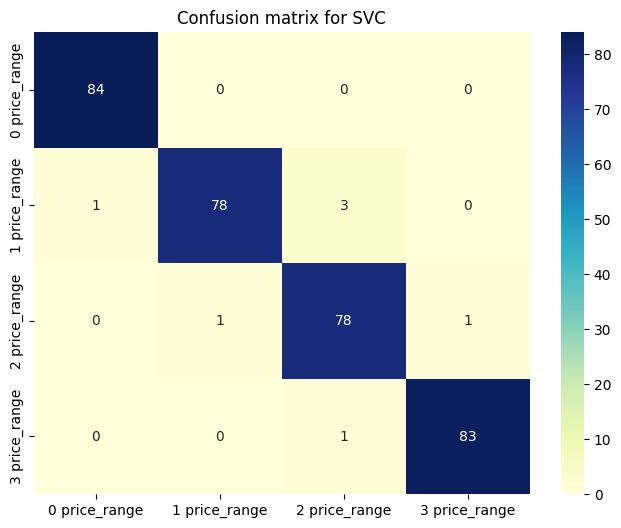

In [105]:
res = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data=res,columns=["0 price_range", "1 price_range", "2 price_range", "3 price_range"], 
                         index=["0 price_range", "1 price_range", "2 price_range", "3 price_range"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion matrix for SVC")
plt.show()

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, max_features='auto')
rfc.fit(X_ttrain, y_ttrain)
y_rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, y_rfc_pred)

0.8757575757575757

In [97]:
# GradBoosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

param_grid = {
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [200, 250],
        'max_depth': [3, 4, 5],
        'min_samples_leaf': [1,3],
        'subsample': [0.5, 1],
        'max_features': ['sqrt', 'None']
}

grid_gbc_model = GridSearchCV(gbc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_gbc_model.fit(X_ttrain, y_ttrain)
grid_gbc_model.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

{'learning_rate': 0.3,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'n_estimators': 250,
 'subsample': 1}

In [100]:
param_grid = {
        'learning_rate': [0.5, 0.6, 0.7],
        'n_estimators': [250],
        'max_depth': [3],
        'min_samples_leaf': [5],
        'subsample': [1],
        'max_features': ['sqrt']
}

grid_gbc_model = GridSearchCV(gbc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_gbc_model.fit(X_ttrain, y_ttrain)
grid_gbc_model.best_params_

{'learning_rate': 0.7,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 250,
 'subsample': 1}

In [103]:
final_gbc_model = GradientBoostingClassifier(learning_rate=0.7, max_depth=3, max_features='sqrt', min_samples_leaf=5, n_estimators=300, subsample=1)
final_gbc_model.fit(X_ttrain, y_ttrain)
y_gbc_pred = final_gbc_model.predict(X_test)
accuracy_score(y_test, y_gbc_pred)

0.8757575757575757

FINAL!!!!!!!!!!!!!!!!!

In [106]:
test_data_frame = test_df.copy()
test_data_frame.drop('index', axis=1, inplace=True)

final_pred = fin_svc_model.predict(test_data_frame)
final_pred

array([1, 3, 3, 1, 3, 3, 1, 0, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3, 2, 1, 1, 1,
       0, 3, 2, 2, 3, 2, 2, 1, 0, 1, 0, 1, 2, 3, 1, 2, 1, 1, 2, 3, 2, 1,
       1, 0, 0, 2, 2, 0, 3, 1, 2, 1, 0, 2, 0, 0, 2, 3, 1, 0, 2, 1, 2, 2,
       0, 2, 3, 1, 3, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 3, 2, 2, 1, 2, 0,
       0, 2, 2, 2, 1, 2, 3, 0, 0, 1, 0, 3, 2, 1, 3, 3, 2, 1, 3, 2, 3, 3,
       2, 2, 3, 2, 3, 3, 3, 0, 1, 3, 2, 2, 3, 0, 0, 1, 3, 2, 2, 1, 3, 0,
       3, 1, 0, 2, 2, 3, 1, 3, 2, 2, 3, 1, 3, 2, 2, 0, 0, 1, 1, 3, 2, 0,
       3, 3, 3, 0, 0, 0, 2, 0, 1, 3, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 0, 2, 2, 2, 3, 1, 0, 3, 3, 0, 1, 1, 2, 2, 1, 2, 3, 0, 3, 1, 2,
       3, 1, 1, 1, 0, 3, 2, 3, 1, 3, 3, 2, 3, 2, 3, 1, 1, 0, 0, 0, 2, 1,
       0, 1, 1, 2, 2, 0, 3, 1, 2, 1, 0, 3, 3, 2, 1, 2, 2, 2, 1, 0, 0, 2,
       3, 2, 2, 1, 1, 3, 2, 3, 0, 1, 2, 2, 0, 2, 3, 0, 3, 0, 3, 0, 2, 0,
       1, 2, 2, 1, 3, 1, 0, 0, 1, 0, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 1, 1,
       1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 2, 1, 1,

In [107]:
submission = pd.DataFrame({'index': test_df['index'],
                          'price_range': final_pred})
submission

,index,price_range
0,1342,1
1,1338,3
2,189,3
3,1332,1
4,1816,3
...,...,...
495,1812,0
496,624,1
497,678,3
498,1208,2


In [109]:
submission.to_csv('submission.csv', index=False)